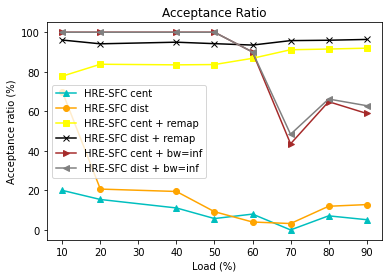

C:\Users\maduc\AppData\Local\Temp\ipykernel_7120\1227225815.py:140: RuntimeWarning: invalid value encountered in true_divide
  utilization = np.array(util)/np.array(n_util)


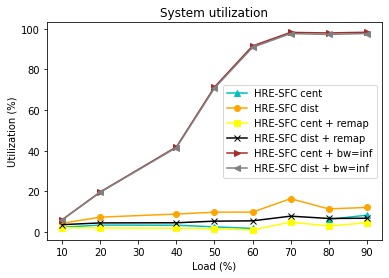

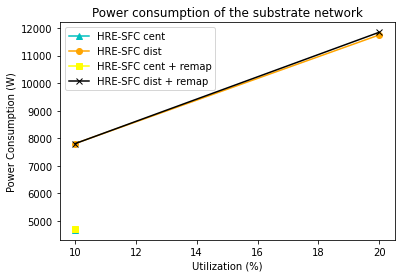

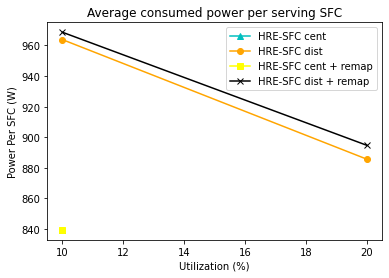

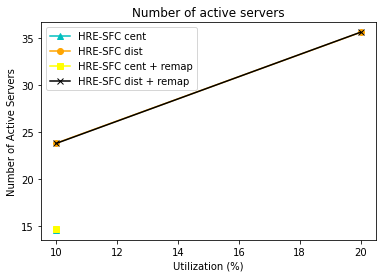

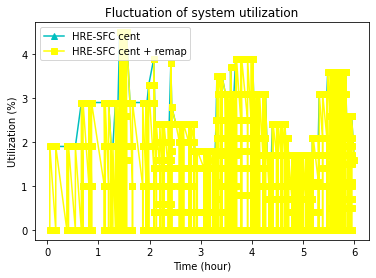

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import csv

COLUMN_TIME = 1
COLUMN_ACTION = 2
COLUMN_NVNFS = 5
COLUMN_UTIL = 9
COLUMN_MIGRATION = 10
COLUMN_POWER = 12
COLUMN_PPERSFC = 13
COLUMN_ACTIVE_SERVER = 14

markers = ["^","o","s","x",">","<","*","+"]
colors = ["c","orange","yellow","black","brown","gray","r","b"]

def open_data():
    folder_name = 'results/4_2_120_420_1090_700/'
    result = []
    label = []

    f = open(folder_name+"limited/cent_1_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC cent')
    f = open(folder_name+"limited/dist_1_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC dist')
    f = open(folder_name+"limited/cent_2d_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC cent + remap')
    f = open(folder_name+"limited/dist_2d_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC dist + remap')
    f = open(folder_name+"inf/cent_1_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC cent + bw=inf')
    f = open(folder_name+"inf/dist_1_event.csv")
    result.append(csv.reader(f))
    label.append('HRE-SFC dist + bw=inf')
    """f = open(folder_name+"VNFGApp/cent_1_event.csv")
    result.append(csv.reader(f))
    label.append('VNFG cent')
    f = open(folder_name+"VNFGApp/dist_1_event.csv")
    result.append(csv.reader(f))
    label.append('VNFG dist')"""

    return result, label

def round_load(load, ydata):
    new_data = [0]*10
    count = [0]*10
    for i in range(len(load)):
        if load[i] < 10: itr = 0
        else:
            itr = round(load[i]/10)-1
        count[itr] += 1
        new_data[itr] += ydata[i]
    result_load = []
    result_y = []
    for i in range(len(count)):
        if count[i] > 0:
            result_load.append((i+1)*10)
            result_y.append(new_data[i]/count[i])
    
    return result_load, result_y

def Figure1(data_id = None, round = False):
    """Acceptance ratio:

    Load (%) - Acceptance Ratio (%)
    """
    data, name = open_data()
    def plottable(data, marker, color, label):
        N_vnf = [0]
        drop = [0]
        deploy = [0]
        c = 0
        for row in data:
            if row[COLUMN_TIME] != 'time':
                t = int(row[COLUMN_TIME])//60
                if t > c:
                    N_vnf.append(0)
                    drop.append(0)
                    deploy.append(0)
                    c += 1
            if row[COLUMN_ACTION] == 'create':
                N_vnf[t] += int(row[COLUMN_NVNFS])
            if row[COLUMN_ACTION] == 'deploy':
                deploy[t] += 1
            if row[COLUMN_ACTION] == 'drop':
                drop[t] += 1
        load = np.array(N_vnf)/np.array([10]*len(N_vnf))
        acceptance = (np.array(deploy))*100/(np.array(deploy)+np.array(drop))
        if round == False:
            plt.plot(load[np.argsort(load)], acceptance[np.argsort(load)], marker=marker, color=color, label=label)
        else:
            load, acceptance = round_load(load,acceptance)
            plt.plot(load, acceptance, marker=marker, color=color, label=label)
    
    fig, ax = plt.subplots()

    if data_id == None:
        for itr in range(len(data)):
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])

    plt.xlabel("Load (%)")
    plt.ylabel("Acceptance ratio (%)")
    ax.set_title("Acceptance Ratio")
    ax.legend()
    plt.show()

def Figure2(data_id = None, round = False):
    """System utilization:

    Load (%) - Utilization (%)
    """
    data, name = open_data()
    def plottable(data, marker, color, label):
        N_vnf = [0]
        util = [0]
        n_util = [0]
        c = 0
        for row in data:
            if row[COLUMN_TIME] != 'time':
                t = int(row[COLUMN_TIME])//60
                if t > c:
                    N_vnf.append(0)
                    util.append(0)
                    n_util.append(0)
                    c += 1
            if row[COLUMN_ACTION] == 'create':
                N_vnf[t] += int(row[COLUMN_NVNFS])
            if row[COLUMN_ACTION] == 'deploy':
                util[t] += float(row[COLUMN_UTIL])
                n_util[t] += 1
        load = np.array(N_vnf)/np.array([10]*len(N_vnf))
        utilization = np.array(util)/np.array(n_util)
        if round == False:
            plt.plot(load[np.argsort(load)], utilization[np.argsort(load)], marker=marker, color=color, label=label)
        else:
            load, utilization = round_load(load,utilization)
            plt.plot(load, utilization, marker=marker, color=color, label=label)
            
    fig, ax = plt.subplots()
    
    if data_id == None:
        for itr in range(len(data)):
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])


    plt.xlabel("Load (%)")
    plt.ylabel("Utilization (%)")
    ax.set_title("System utilization")
    ax.legend()
    plt.show()

def Figure3(data_id = None):
    """Power consumption of the substrate network:

    Utilization (%) - Power Consumption (W)
    """
    data, name = open_data()
    def power_con(data, marker, color, label):
        power = [0]*10
        count = [0]*10
        for row in data:
            if row[COLUMN_ACTION] == 'create':
                i = int(float(row[COLUMN_UTIL])/10)
                if i >= 10: i = 9
                power[i] = (count[i]*power[i] + float(row[COLUMN_POWER]))/(count[i]+1)
                count[i] += 1
        while len(power)>0:
            if power[-1] == 0: power = power[:-1]
            else: break
        plt.plot([(i+1)*10 for i in range(len(power))], power, marker=marker, color=color, label=label)
    
    fig, ax = plt.subplots()

    if data_id == None:
        for itr in range(len(data)):
            power_con(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            power_con(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])

    
    plt.xlabel("Utilization (%)")
    plt.ylabel("Power Consumption (W)")
    ax.set_title("Power consumption of the substrate network")
    ax.legend()
    plt.show()

def Figure4(data_id = None):
    """Average consumed power per serving SFC:

    Utilization (%) - Power Per SFC (W)
    """
    data, name = open_data()
    def power_per_sfc(data, marker, color, label):
        power = [0]*10
        count = [0]*10
        for row in data:
            if row[COLUMN_ACTION] == 'create':
                i = int(float(row[COLUMN_UTIL])/10)
                if i >= 10: i = 9
                power[i] = (count[i]*power[i] + float(row[COLUMN_PPERSFC]))/(count[i]+1)
                count[i] += 1
        while len(power)>0:
            if power[-1] == 0: power = power[:-1]
            else: break
        plt.plot([(i+1)*10 for i in range(len(power))], power, marker=marker, color=color, label=label)
    
    fig, ax = plt.subplots()

    if data_id == None:
        for itr in range(len(data)):
            power_per_sfc(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            power_per_sfc(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])

    
    plt.xlabel("Utilization (%)")
    plt.ylabel("Power Per SFC (W)")
    ax.set_title("Average consumed power per serving SFC")
    ax.legend()
    plt.show()

def Figure5(data_id = None):
    """Number of active servers:

    Utilization (%) - Number of Active Servers
    """
    data, name = open_data()
    def active_server(data, marker, color, label):
        number = [0]*10
        count = [0]*10
        for row in data:
            if row[COLUMN_ACTION] == 'create':
                i = int(float(row[COLUMN_UTIL])/10)
                if i >= 10: i = 9
                number[i] = (count[i]*number[i] + float(row[COLUMN_ACTIVE_SERVER]))/(count[i]+1)
                count[i] += 1
        while len(number)>0:
            if number[-1] == 0: number = number[:-1]
            else: break
        plt.plot([(i+1)*10 for i in range(len(number))], number, marker=marker, color=color, label=label)
    
    fig, ax = plt.subplots()

    if data_id == None:
        for itr in range(len(data)):
            active_server(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            active_server(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])

    plt.xlabel("Utilization (%)")
    plt.ylabel("Number of Active Servers")
    ax.set_title("Number of active servers")
    ax.legend()
    plt.show()

def Figure6(start_time,end_time,time_format='hour',data_id = None,):
    """Fluctuation of system utilization:

    Time (hour) - Utilization (%)

    start_time, end_time: Thời gian bắt đầu và kết thúc

    time_format: Định dạng thời gian của start_time và end_time, có giá trị là 'hour' và 'minute'. Mặc định là 'hour'
    """
    data, name = open_data()
    if time_format == 'hour':
        start_time = start_time*60
        end_time = end_time*60

    def plottable(data, marker, color, label):
        time = []
        util = []
        for row in data:
            if row[1] == 'time' or int(row[COLUMN_TIME]) < start_time or int(row[COLUMN_TIME]) > end_time or row[COLUMN_ACTION] == 'create' or row[COLUMN_UTIL] == '-': continue
            else:
                time.append(int(row[COLUMN_TIME]))
                util.append(float(row[COLUMN_UTIL]))

        plt.plot(np.array(time)/60, np.array(util), marker=marker, color=color, label=label)
    
    fig, ax = plt.subplots()

    if data_id == None:
        for itr in range(len(data)):
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])
    else:
        for itr in data_id:
            plottable(data[itr], marker=markers[itr], color=colors[itr], label=name[itr])

    plt.xlabel("Time (hour)")
    plt.ylabel("Utilization (%)")
    ax.set_title("Fluctuation of system utilization")
    ax.legend()
    plt.show()


if __name__ == "__main__":
    Figure1(round=True)
    Figure2(round=True)
    Figure3([0,1,2,3])
    Figure4([0,1,2,3])
    Figure5([0,1,2,3])
    Figure6(start_time=0,end_time=6,data_id=[0,2])